In [3]:
from eve import Eve
from eve_plus import EvePlus
from models import *


import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.backends.cudnn as cudnn

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from utils import lr_down_linearly, lr_increased_linearly
from utils import lr_up_linearly


%reload_ext autoreload
%autoreload 2


In [ ]:
### pytorch cifar

In [4]:
# variables
batch_size = 128
cuda = torch.cuda.is_available()


transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# load data
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)





Files already downloaded and verified
Files already downloaded and verified


In [5]:
def range_train(epoch_index, model, optimizer):
    for batch_index, (data, target) in enumerate(train_loader):
#         if epoch_index == 1 and batch_index <= 50:
#             for param_group in optimizer.param_groups:
#                 param_group['lr'] = 0.01
#         else:
        model.train()
        optimizer = lr_up_linearly(optimizer, epoch_index, batch_index)
        if cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        
        def closure():
            optimizer.zero_grad()  # reset optimizer
            output = model(data)
            loss = F.nll_loss(output, target)  # negative log likelihood loss
            loss.backward()  # backprop
            return loss
        loss = optimizer.step(closure)
        lr_batch = optimizer.param_groups[0]['lr']
        if batch_index % 39 == 0:
            print ('\rlr', lr_batch)
        val_accuracy = range_test(batch_index, model)
        val_accuracy_list.append(val_accuracy)
        lr_list.append(lr_batch)
        
        if batch_index != 0 and batch_index % 390 == 0:
            print('\rOne epoch train end: {} Loss: {}'.format(epoch_index, loss))
        # eval model
         
    return 'success'

In [6]:
def range_test(batch_index, model):
    model.eval()
    test_loss = 0
    correct = 0
#     print (model.features[0].weight)
    for data, target in test_loader:
        if cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)
        pred = output.data.max(1)[1]  # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()
    val_accuracy = correct / len(test_loader.dataset)
    if batch_index % 39 == 0:
        print ('\rcorrect', correct, end="")
        print('\nTest set: batch_index {} Accuracy: {}/{} ({:.2%})'.format(
            batch_index, correct, len(test_loader.dataset), val_accuracy
            ))
    return val_accuracy

In [ ]:
import time
time_start = time.time()
epoch_num = 4
val_accuracy_list= []
lr_list = []
torch.manual_seed(233)
model = VGG('VGG16')
if cuda:
    model.cuda()
    model = torch.nn.DataParallel(model, device_ids=range(torch.cuda.device_count()))
    cudnn.benchmark = True
#     model = torch.nn.DataParallel(model, device_ids=range(torch.cuda.device_count()))
#     cudnn.benchmark = True
optimizer = optim.SGD(model.parameters(), lr=0)
for epoch_index in range(1, epoch_num + 1):
    result = range_train(epoch_index, model, optimizer)
    print (result)

time_end = time.time()
time_cost = time_end - time_start
print (time_cost)

lr 3.1969309462915605e-05
correct 1000
Test set: batch_index 0 Accuracy: 1000/10000 (10.00%)
lr 0.0012787723785166244
correct 1000
Test set: batch_index 39 Accuracy: 1000/10000 (10.00%)
lr 0.0025255754475703306
correct 2084
Test set: batch_index 78 Accuracy: 2084/10000 (20.84%)
lr 0.003772378516624037
correct 2459
Test set: batch_index 117 Accuracy: 2459/10000 (24.59%)
lr 0.006265984654731481
correct 2537
Test set: batch_index 195 Accuracy: 2537/10000 (25.37%)
lr 0.0075127877237852045
correct 1930
Test set: batch_index 234 Accuracy: 1930/10000 (19.30%)
lr 0.008759590792838902
correct 1829
Test set: batch_index 273 Accuracy: 1829/10000 (18.29%)
lr 0.01000639386189259
correct 2451
Test set: batch_index 312 Accuracy: 2451/10000 (24.51%)
lr 0.01125319693094628
correct 2294
Test set: batch_index 351 Accuracy: 2294/10000 (22.94%)
lr 0.01249999999999997
correct 1724
Test set: batch_index 390 Accuracy: 1724/10000 (17.24%)
One epoch train end: 1 Loss: Variable containing:
-396.5046
[torch.cuda.

Process Process-1123:
Process Process-785:
Process Process-1124:
Process Process-786:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/ubuntu

KeyboardInterrupt: 

In [10]:
len(acc_lst)
# lt_lst

559

In [22]:
import pickle

with open("range-test-model-vgg16-559-0.05-4epochs.txt", 'wb') as fp:
    pickle.dump(acc_lst, fp)

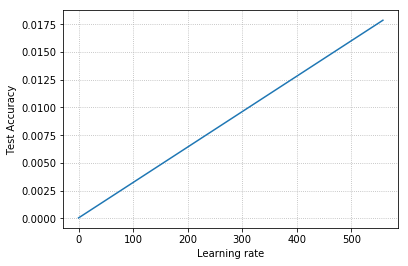

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(0, 559*0.05/(391*4), 0.05/(391*4))
plt.plot(x, acc_lst)
plt.xlabel("Learning rate")
plt.ylabel("Test Accuracy")
plt.grid(ls=":")
# plt.xticks(np.arange(0, 0.05, 50))

